In [284]:
import pandas as pd

df = pd.read_csv('99agent.csv')
df.columns = df.columns.str.lower()
df.columns

Index(['agent name', 'total listings', 'agency no', 'agent no', 'agency name',
       'phone', 'response rate', 'respond with in', 'featured agent?',
       'sale/rent breakdown', 'listing type breakdown',
       'top district breakdown', 'top condo breakdown'],
      dtype='object')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 13 columns):
agent name                20492 non-null object
total listings            20493 non-null int64
agency no                 20493 non-null object
agent no                  20493 non-null object
agency name               20493 non-null object
phone                     20492 non-null object
response rate             8287 non-null float64
respond with in           8287 non-null object
featured agent?           281 non-null object
sale/rent breakdown       9270 non-null object
listing type breakdown    9270 non-null object
top district breakdown    9270 non-null object
top condo breakdown       8967 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 2.0+ MB


In [223]:
df['total listings'].describe()

count    20493.000000
mean         6.543600
std         19.481912
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max        582.000000
Name: total listings, dtype: float64

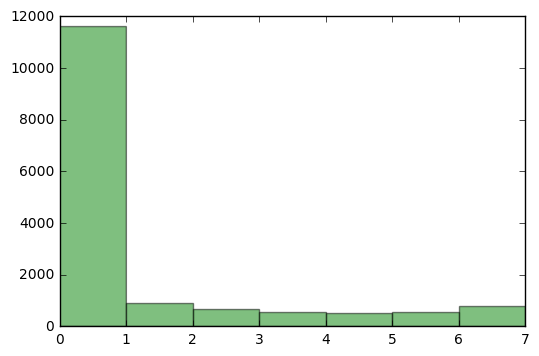

In [282]:
import matplotlib.pyplot as plt 

plt.hist(df['total listings'], bins=range(0, 8, 1), color='green', alpha=.5)

axes = plt.gca()
axes.set_ylim([0,12000])

plt.show()

In [237]:
df_res = df[df['response rate'].isnull() == False]
df_res = df_res[df_res['total listings'] > 0]
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 8650
Data columns (total 13 columns):
agent name                8286 non-null object
total listings            8287 non-null int64
agency no                 8287 non-null object
agent no                  8287 non-null object
agency name               8287 non-null object
phone                     8287 non-null object
response rate             8287 non-null float64
respond with in           8287 non-null object
featured agent?           230 non-null object
sale/rent breakdown       8204 non-null object
listing type breakdown    8204 non-null object
top district breakdown    8204 non-null object
top condo breakdown       7991 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 906.4+ KB


In [251]:
df_res['response rate'].describe()

count    8287.000000
mean        0.550421
std         0.261797
min         0.250000
25%         0.250000
50%         0.530000
75%         0.770000
max         1.000000
Name: response rate, dtype: float64

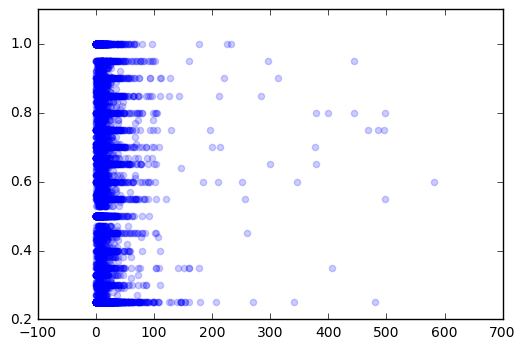

In [253]:
plt.scatter(x=df_res['total listings'], y=df_res['response rate'], color='blue', alpha=.2)
plt.show()

In [277]:
df_res = df_res[df_res['total listings'] < 8]
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3509 entries, 4862 to 8650
Data columns (total 13 columns):
agent name                3508 non-null object
total listings            3509 non-null int64
agency no                 3509 non-null object
agent no                  3509 non-null object
agency name               3509 non-null object
phone                     3509 non-null object
response rate             3509 non-null float64
respond with in           3509 non-null object
featured agent?           146 non-null object
sale/rent breakdown       3439 non-null object
listing type breakdown    3439 non-null object
top district breakdown    3439 non-null object
top condo breakdown       3232 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 383.8+ KB


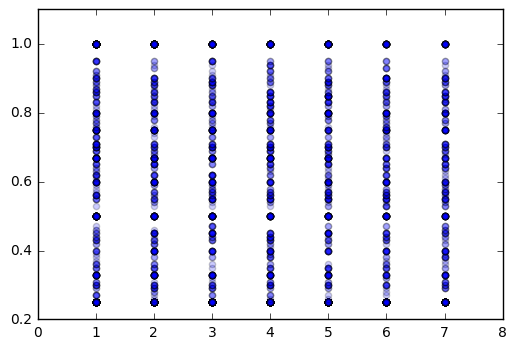

In [274]:
plt.scatter(df_res['total listings'], df_res['response rate'], alpha=.2)
plt.show()

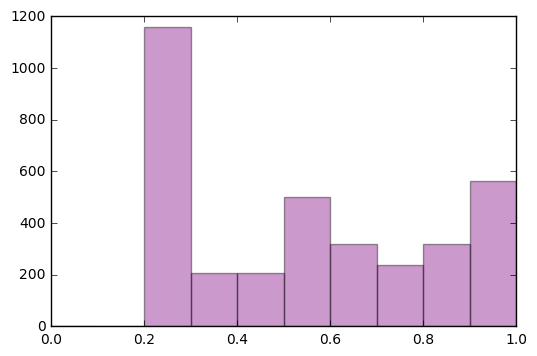

In [280]:
# Distribution of response rate
plt.hist(x = df_res['response rate'], bins=10, range=(0,1), color='purple', alpha=.4)
plt.show()

In [187]:
# For reference of groupby method 
df_g = df.groupby(['total listings','response rate']).size().reset_index(name='agent no')
df_g.head(2)

,total listings,response rate,agent no
0,1,0.25,222
1,1,0.27,5


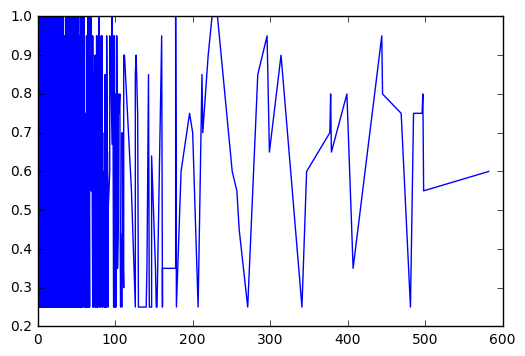

In [186]:
plt.plot(df_g['total listings'], df_g['response rate'])
plt.show()

# Doesn't show any correlation 

In [95]:
df['respond with in'].describe()

count                                     8287
unique                                      15
top       Usually responds in more than 3 days
freq                                      3553
Name: respond with in, dtype: object

In [121]:
# df['respond with in'] = df['respond with in'].astype('category')
